<a href="https://colab.research.google.com/github/bhanu0925/ML_RoadTrafficAcident_Severity_Classification/blob/main/Road_Traffic_Accident_Severity_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Road Traffic Accident Severity Classification

This data set is collected from Addis Ababa Sub city police departments for Masters research work. The data set has been prepared from manual records of road traffic accident of the year 2017-20.

In [ ]:
import os
ROOT = "/content/drive/MyDrive/ML/"
os.chdir(ROOT)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

## Load the data

In [ ]:
pd.set_option('display.max_columns', None)
RTA_Data = pd.read_csv('RTA_Dataset.csv')
RTA_Data.head(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
RTA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### 1. Missing Values

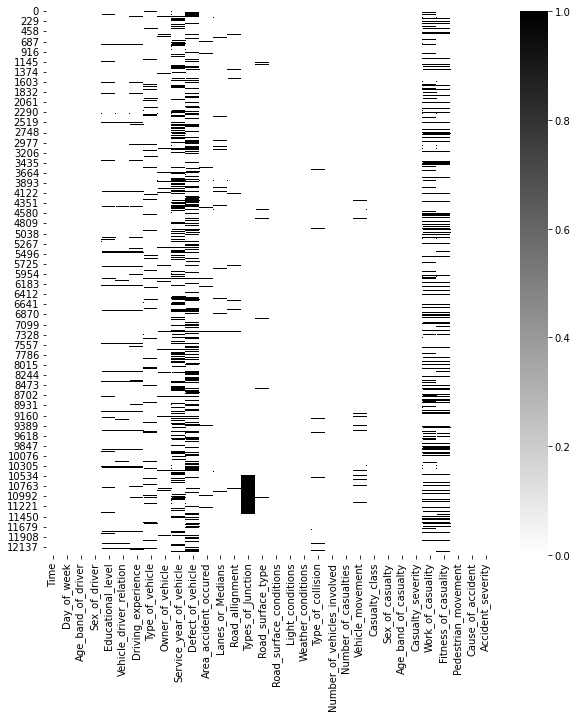

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(RTA_Data.isnull(),cmap='binary')

### Missing Values in percentages

In [ ]:
cols = []
per = []
miss_val_col = []

for col in RTA_Data.columns:
    cols.append(col)
    pert = (RTA_Data[col].isnull().sum()/RTA_Data.shape[0])*100
    per.append(pert)
    if RTA_Data[col].isnull().sum() > 0:
        miss_val_col.append(col)        
df_null_pert = pd.DataFrame({"columns" : cols, "Percentage" : per})
df_null_pert

,columns,Percentage
0,Time,0.000000
1,Day_of_week,0.000000
2,Age_band_of_driver,0.000000
3,Sex_of_driver,0.000000
4,Educational_level,6.016564
5,Vehicle_driver_relation,4.701202
6,Driving_experience,6.731082
7,Type_of_vehicle,7.713543
8,Owner_of_vehicle,3.913608
9,Service_year_of_vehicle,31.893472


In [ ]:
miss_val_col

['Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Type_of_collision',
 'Vehicle_movement',
 'Work_of_casuality',
 'Fitness_of_casuality']

## Columns with Missing values more than 20%

In [ ]:
mask = df_null_pert['Percentage'] >= 20
missing_more_than_20per_col = df_null_pert[mask]['columns'].values
df_null_pert[mask]

,columns,Percentage
9,Service_year_of_vehicle,31.893472
10,Defect_of_vehicle,35.945112
27,Work_of_casuality,25.966223
28,Fitness_of_casuality,21.394933


In [ ]:
missing_more_than_20per_col

array(['Service_year_of_vehicle', 'Defect_of_vehicle',
       'Work_of_casuality', 'Fitness_of_casuality'], dtype=object)

### 2. Categorical Columns and its unique values

In [ ]:
RTA_Data.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


### Few points to note from the above summary

1. Number of vehicles involved in an accident is average of 2
2. Number of people injured in an accident is 1 to 2
3. Maximum vehicals involed in an accident is 7
4. Maximum people injured in a accident is 8

In [ ]:
RTA_Data.describe(include=['O']).T  ## or RTA_Data.describe(include='object')

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Service_year_of_vehicle,8388,6,Unknown,2883


### Few points to note from the above summary

1. Most of the accidents took place on Friday
2. Most of the accidents happend in the (mid of the dat) afternoon, in day time
3. The age band of the driver 18-30
4. Most drivers were Male
5. Most of the drivers had driving experience of 5-10 yers
6. Vehicles involded in the accidents where autimobiles
7. Most them owned the vehicles
8. Most Accidents took place while going straight
9. Most of the casualities are Male
10. The more casualities were also drivers
11. Casualities were not a pedestrains
12. Cause of accident is not maintaining distance
13. Most of the accident severity were slightly injured. - > this shows imbalance in data
14. Most accident took place in two way roads
15. Road alligment - Tangent road with flat terrain	
16. Type of junction - Y Shape
17. Roadsurface type - Asphalt roads
18. Road surface condition - dry
19. Lighting condition Daylight - (This is same as time feature , most accident happend during day time)
20. weather condition - normal

### No Duplicate rows

In [ ]:
RTA_Data[RTA_Data.duplicated()]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity


# **3. Data Visualization**

### Univeriate Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a4c0d1790>,
      dtype=object)

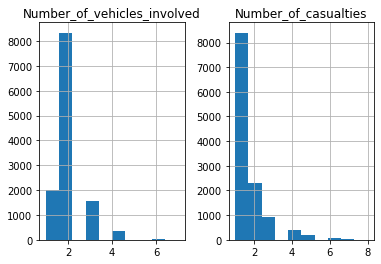

In [ ]:
RTA_Data.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


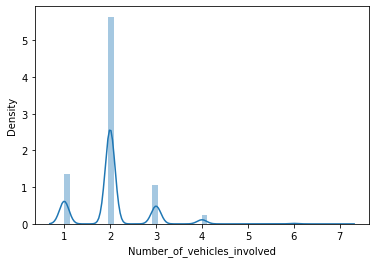

In [ ]:
sns.distplot(RTA_Data['Number_of_vehicles_involved'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


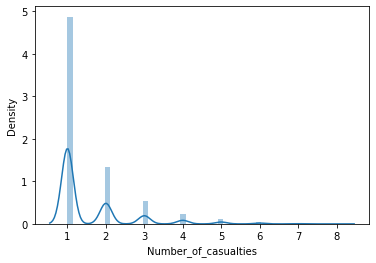

In [ ]:
sns.distplot(RTA_Data['Number_of_casualties'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


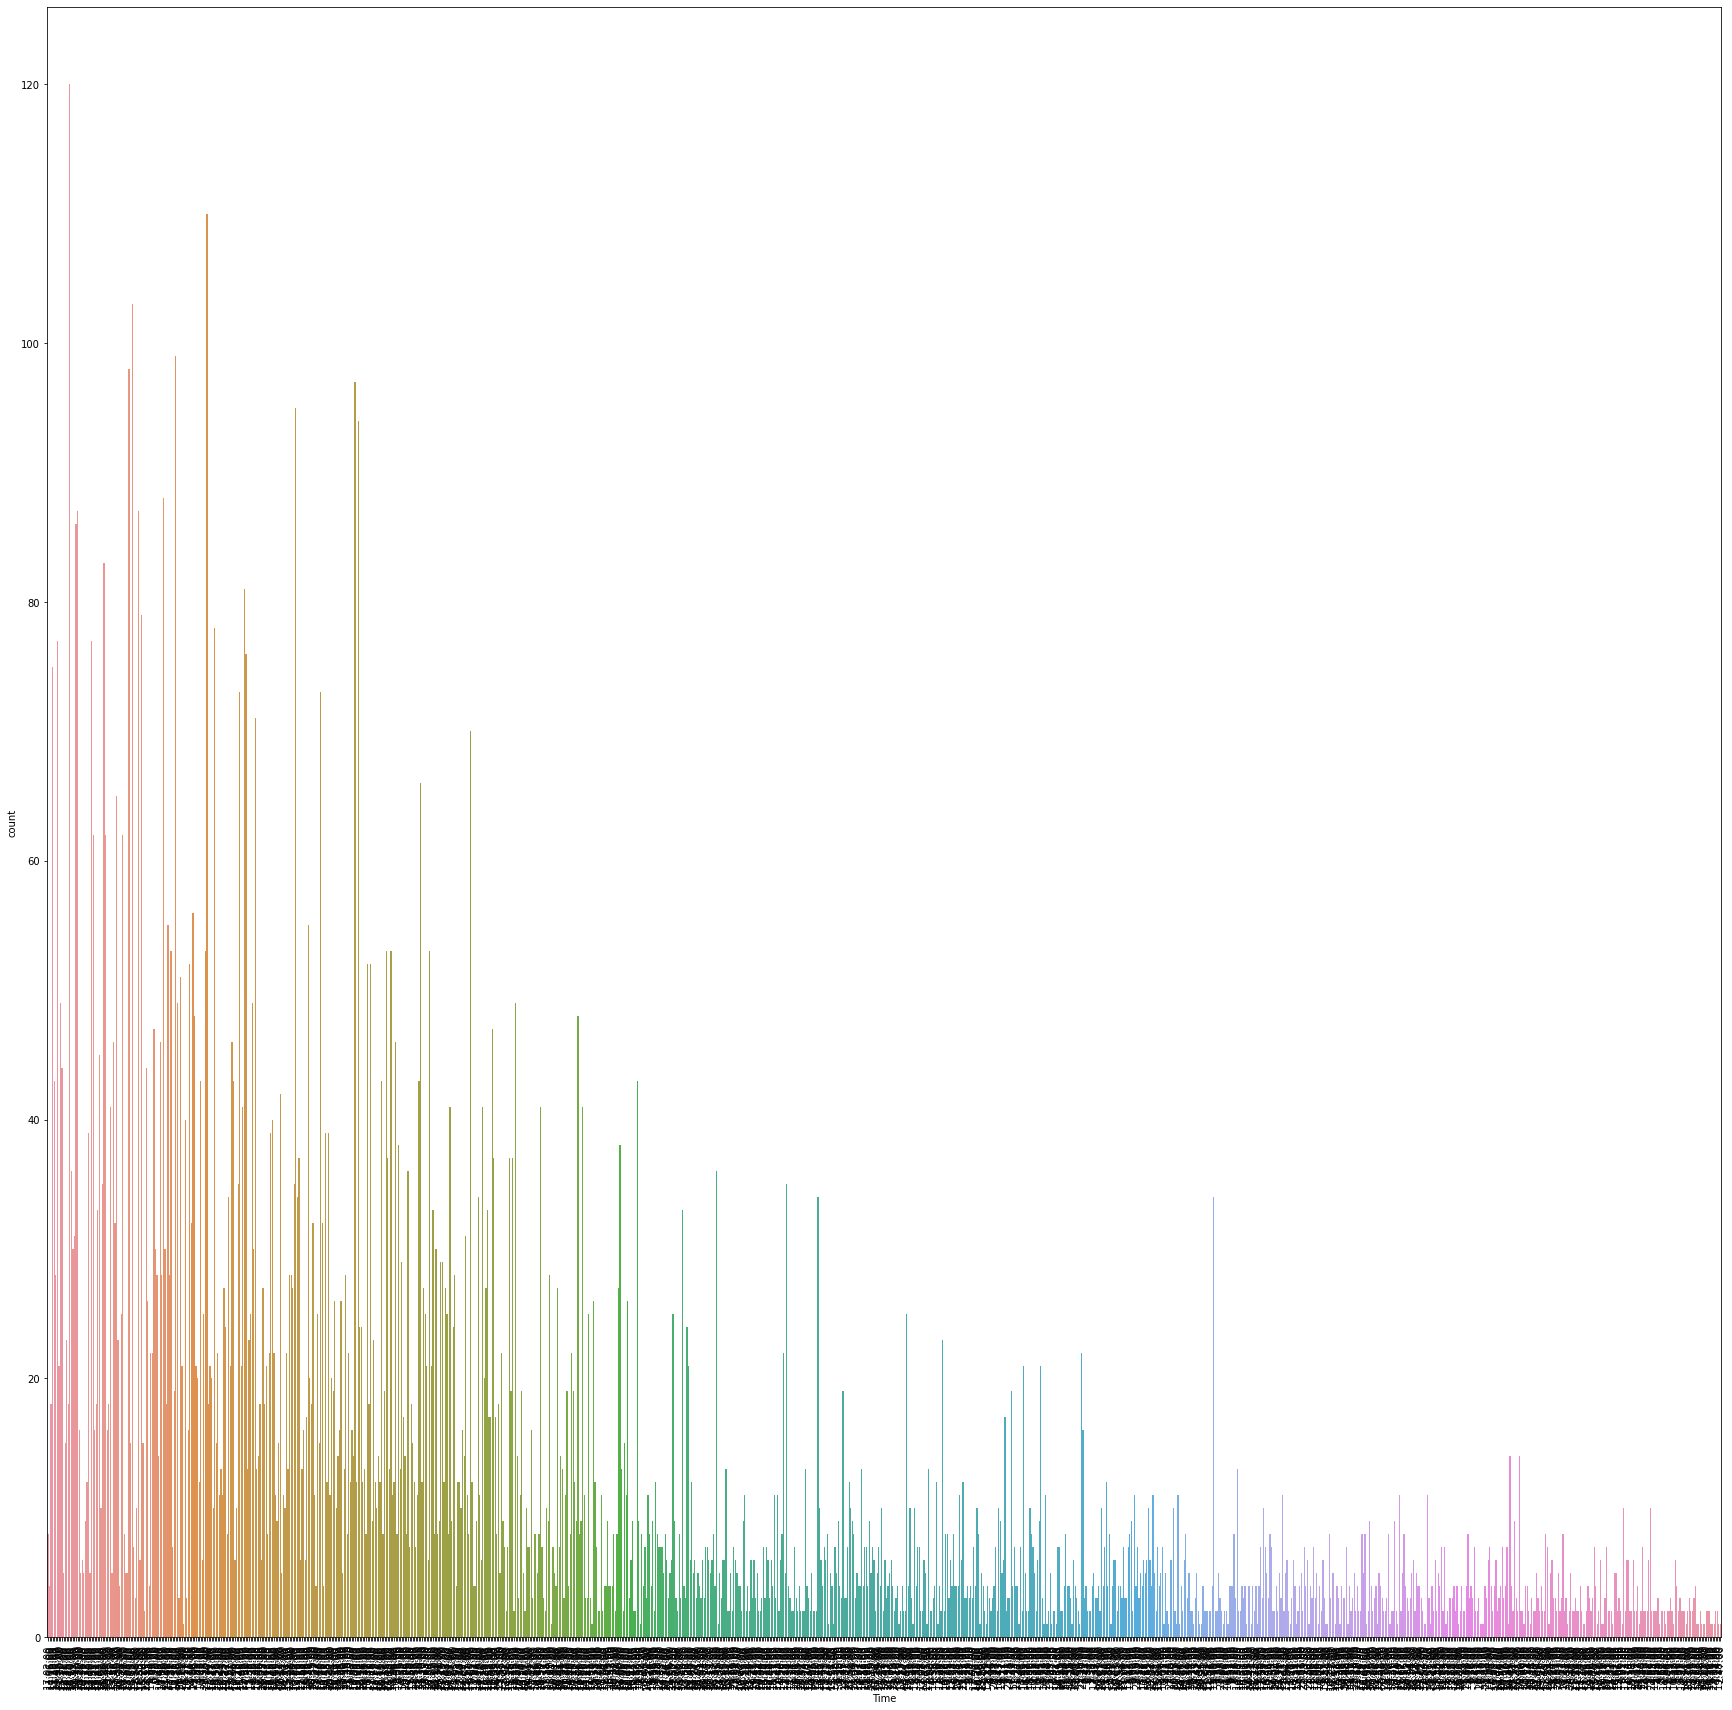

In [ ]:
plt.figure(figsize=(30,30))
sns.countplot(RTA_Data['Time'])
plt.xticks(rotation=90);

In [ ]:
def fetchtime(x):
    return(int(x.split(':')[0]))

RTA_Data['Time'] = RTA_Data['Time'].apply(fetchtime)
RTA_Data


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
def categorizetime(x):
    if x >=6 and x < 18 :
        return('Day')
    elif x < 6 or x >= 18:
        return('Night')
RTA_Data['Time'] = RTA_Data['Time'].apply(categorizetime)
RTA_Data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Day,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Day,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Day,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Night,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Day,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,1,1,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Day,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,1,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
RTA_Data['Time'].unique()

array(['Day', 'Night'], dtype=object)

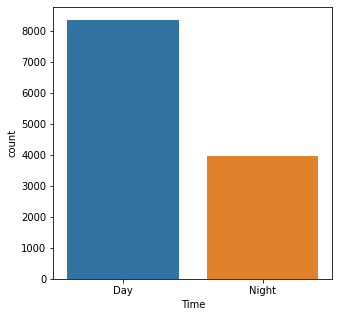

In [ ]:
plt.figure(figsize=(5,5))
sns.countplot(x=RTA_Data['Time'])

In [ ]:
def catDistribution(col_name):
    print(f"null Value : {RTA_Data[col_name].isnull().sum()}")
    print(f"Unique values - {RTA_Data[col_name].unique()}")
    sns.countplot(x=RTA_Data[col_name])
    plt.xticks(rotation=90);
    plt.show()

null Value : 0
Unique values - ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']


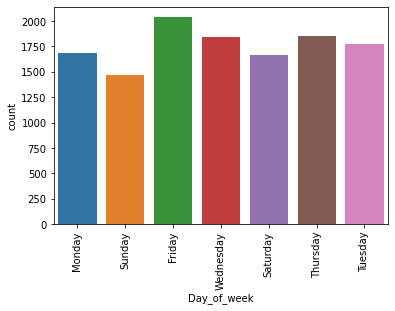

In [ ]:
catDistribution('Day_of_week')

In [ ]:
cat_col = RTA_Data.select_dtypes(include='object').columns
cat_col

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

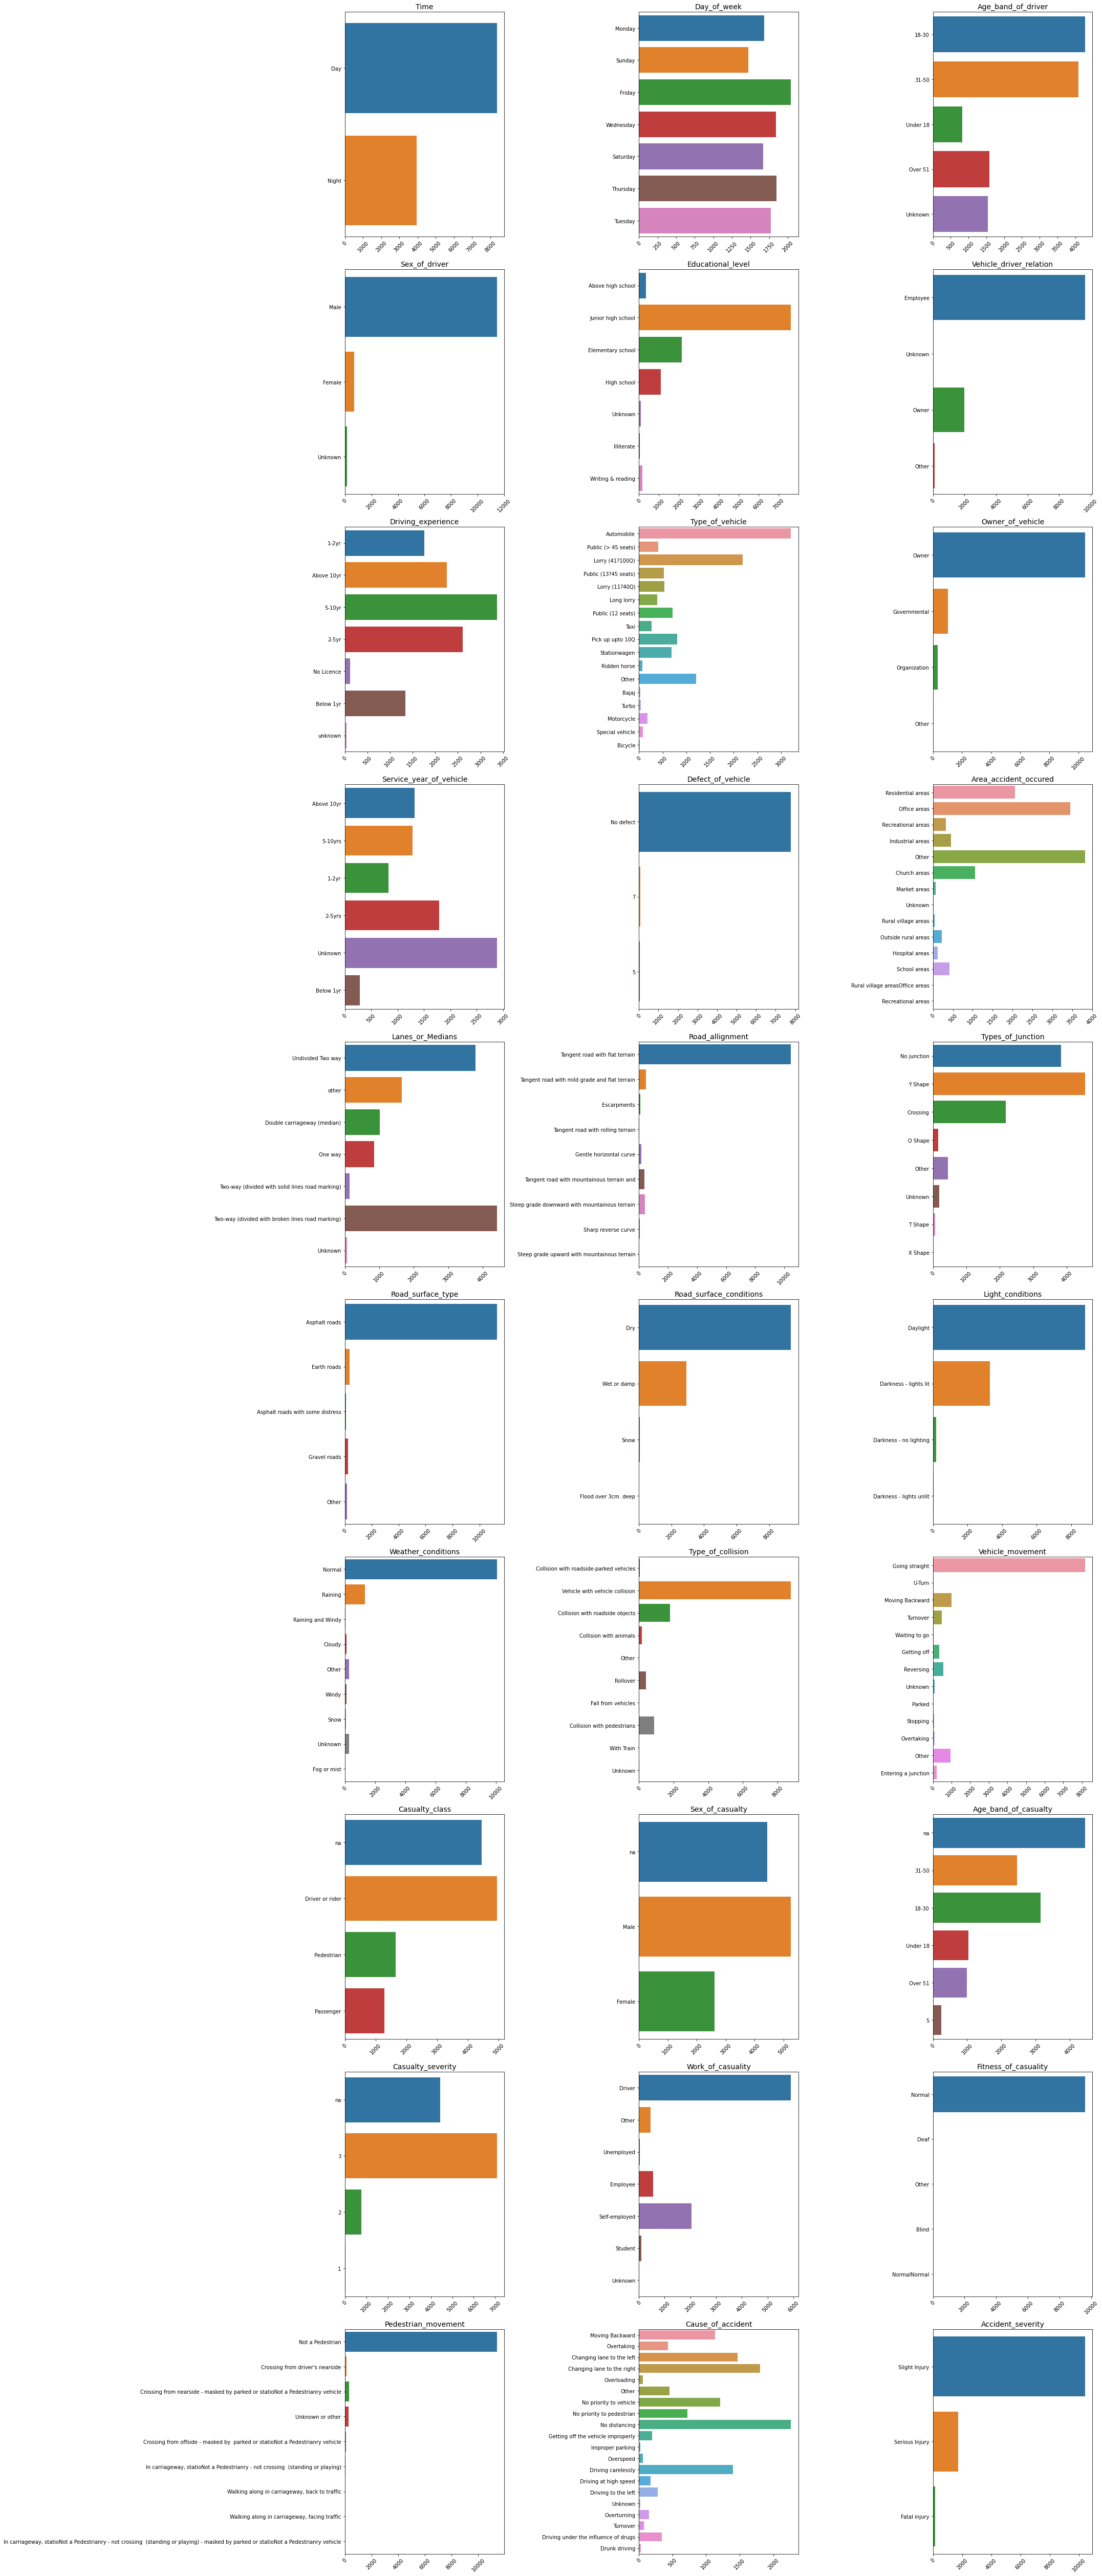

In [ ]:
plt.figure(figsize = (30, 70))
for i in enumerate(cat_col):
    plt.subplot(10, 3,i[0]+1,)
    sns.countplot(y=i[1],data = RTA_Data)
    plt.xticks(rotation = 45)
    plt.title(i[1], fontsize=14)
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout() 

### Target columns

null Value : 0
Unique values - ['Slight Injury' 'Serious Injury' 'Fatal injury']


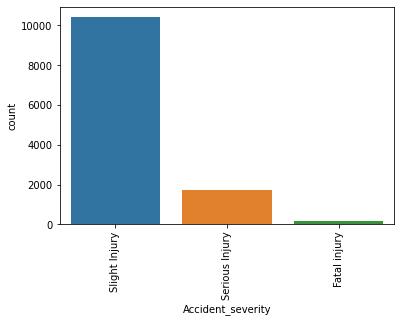

In [ ]:
catDistribution('Accident_severity')

## 2. Data Preprocessing

In [ ]:
RTA_Data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### Seperating numeric and cat columns

In [ ]:
num_cols = RTA_Data.dtypes[RTA_Data.dtypes == 'int64'].index.tolist()
cat_cols = RTA_Data.dtypes[RTA_Data.dtypes != 'int64'].index.tolist()
RTA_Data[cat_cols]

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,Day,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,Day,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,Day,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,Night,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,Night,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,Day,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,Outside rural areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,Night,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Escarpments,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,Day,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,Outside rural areas,Two-way (divided with broken lines road marking),Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,Day,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,Office areas,Undivided Two way,Tangent road with mountainous terrain and,No junction,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [ ]:
sorted(["Slight Injury", "Serious Injury", "Fatal injury"])

['Fatal injury', 'Serious Injury', 'Slight Injury']

In [ ]:
# dropping columns that can cause imbalance while imputation
RTA_Data.drop(columns = ['Service_year_of_vehicle', 'Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality'], inplace=True)

In [ ]:
def catFillMissingValueWithMode(df, col):
    df[col].fillna(value=df[col].mode()[0],inplace=True)
    return df

In [ ]:
for col in RTA_Data.columns:
    if RTA_Data[col].dtype == 'object':
        RTA_Data = catFillMissingValueWithMode(RTA_Data,col)

In [ ]:
RTA_Data.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [ ]:
RTA_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Area_accident_occured        12316 non-null  object
 10  Lanes_or_Medians             12316 non-null  object
 11  Road_allignment              12316 non-null  object
 12  Types_of_Junction            12316 non-null  object
 13  Road_surface_type            12

### ordinal encoding categorical columns

In [ ]:
def ordinal_encoder(df, feats): 
  for feat in feats:    
    feat_val = list(1+np.arange(df[feat].nunique()))
    feat_key = list(df[feat].sort_values().unique())
    feat_dict = dict(zip(feat_key, feat_val))
    df[feat] = df[feat].map(feat_dict)
  return df

RTA_Data = ordinal_encoder(RTA_Data, RTA_Data.drop(['Accident_severity'], axis=1).columns)
RTA_Data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,2,1,2,1,1,1,1,4,10,3,6,2,1,1,4,3,4,2,2,3,4,3,6,4,6,10,Slight Injury
1,1,2,2,2,5,1,4,12,4,7,5,6,2,1,1,4,3,9,2,2,3,4,3,6,4,6,17,Slight Injury
2,1,2,1,2,5,1,1,6,4,2,7,6,2,1,1,4,3,3,2,2,3,1,2,2,3,6,1,Serious Injury
3,2,4,1,2,5,1,3,12,1,7,7,7,8,3,1,1,3,9,2,2,3,3,1,1,3,6,2,Slight Injury
4,2,4,1,2,5,1,2,1,4,5,7,6,8,1,1,1,3,9,2,2,3,4,3,6,4,6,17,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,7,2,2,5,1,2,5,4,6,5,6,2,1,1,4,3,9,2,1,3,4,3,6,4,6,11,Slight Injury
12312,2,4,5,2,2,1,3,1,4,6,3,1,2,1,1,4,3,9,2,1,5,4,3,6,4,6,11,Slight Injury
12313,1,4,3,2,5,1,3,2,4,6,3,8,2,1,1,4,3,9,1,1,5,1,2,2,3,6,2,Serious Injury
12314,1,4,1,1,5,1,4,6,4,7,5,8,2,1,1,1,3,9,2,1,5,4,3,6,4,6,6,Slight Injury


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


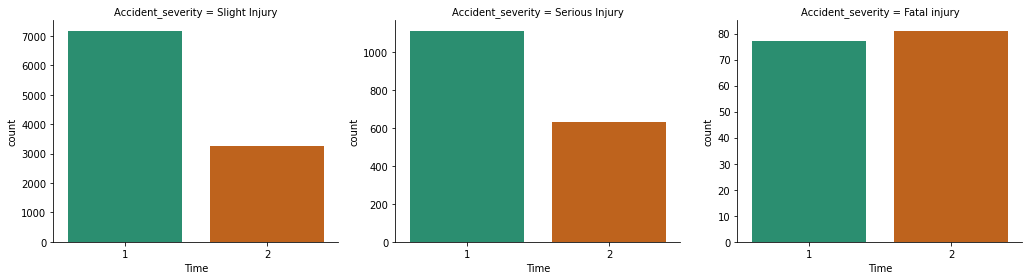

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


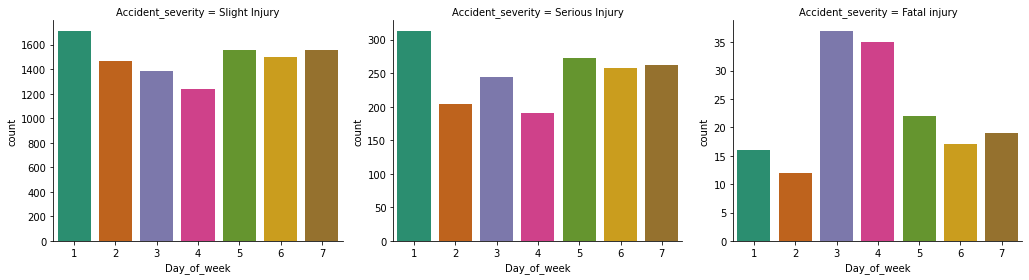

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


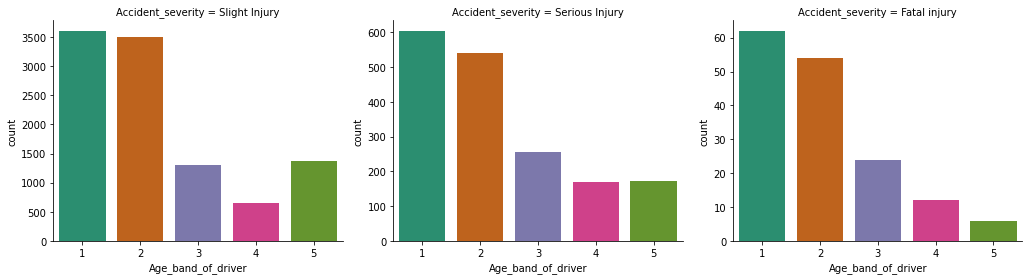

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


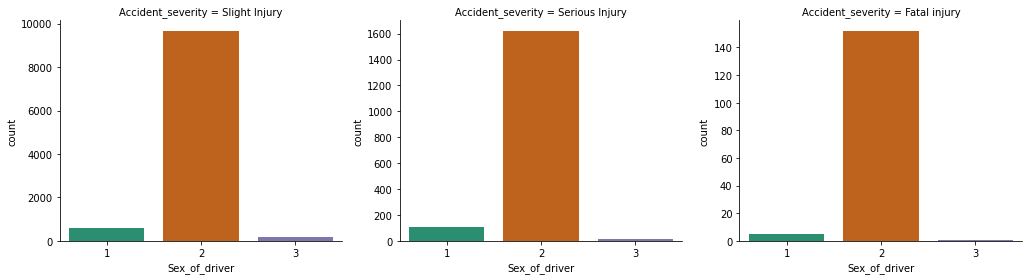

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


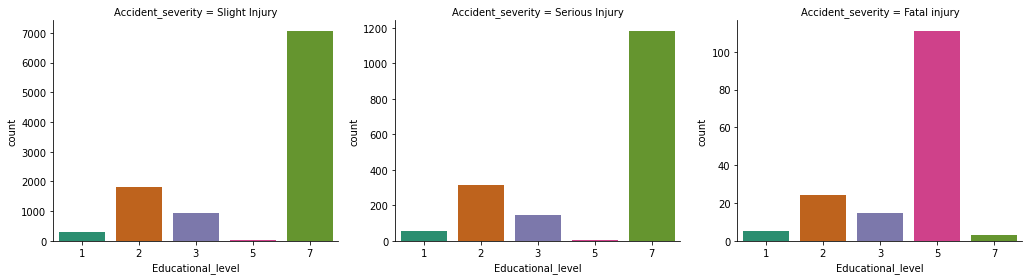

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


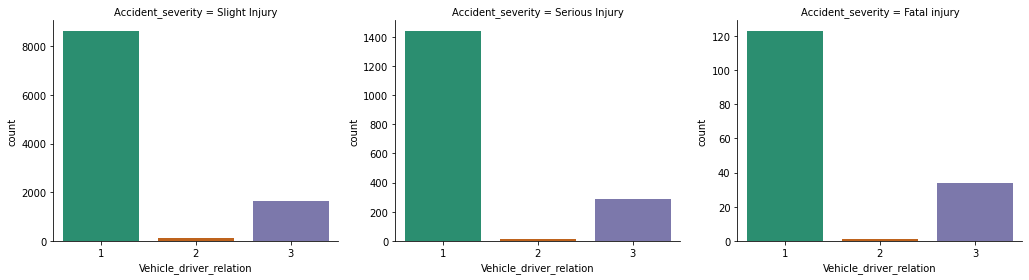

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


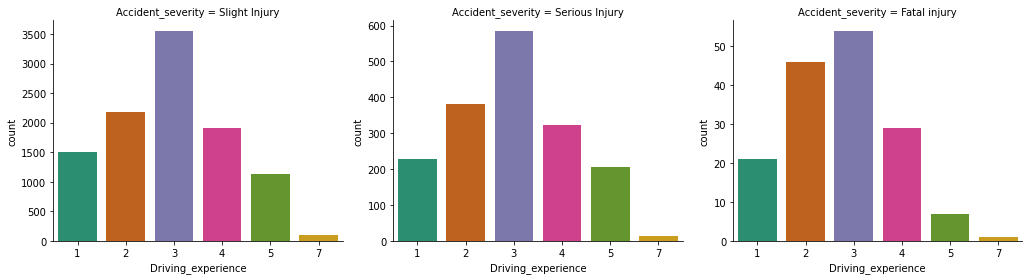

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


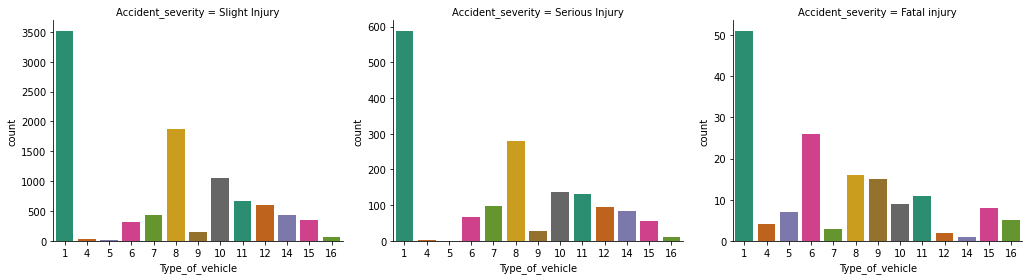

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


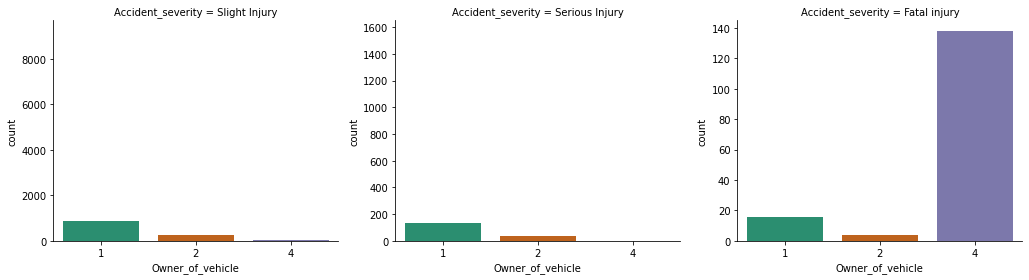

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


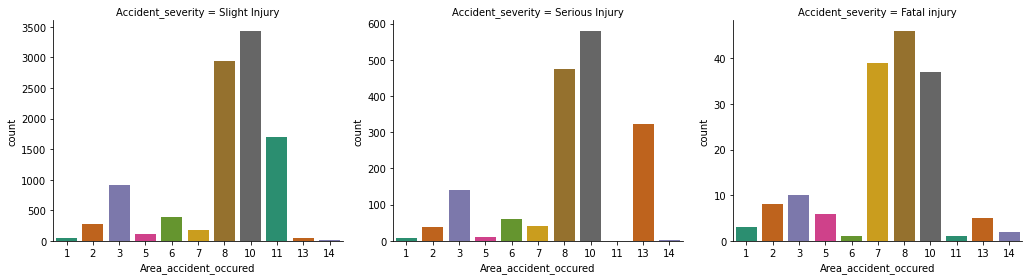

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


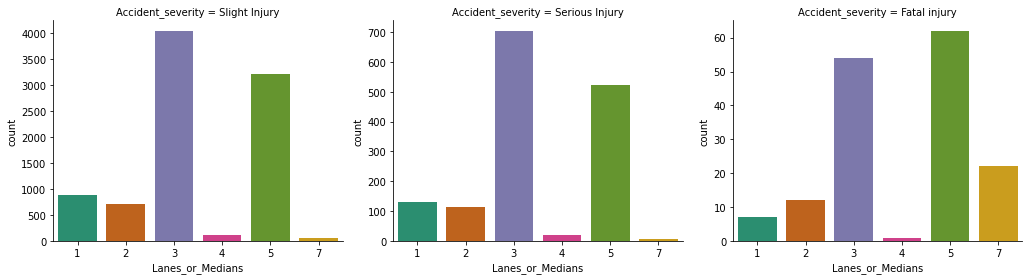

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


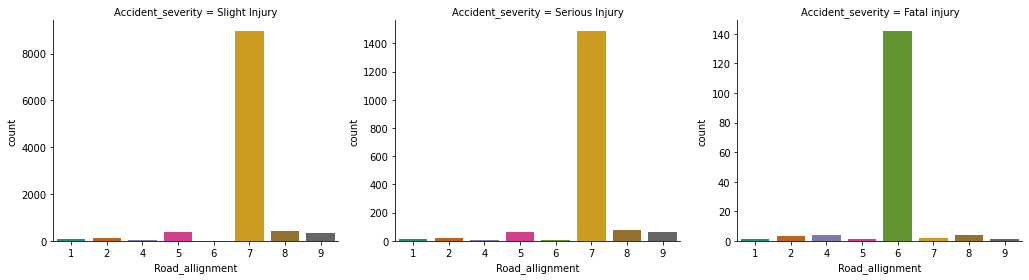

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


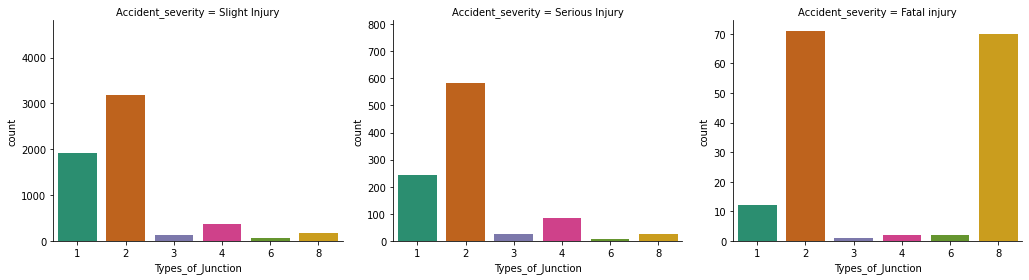

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


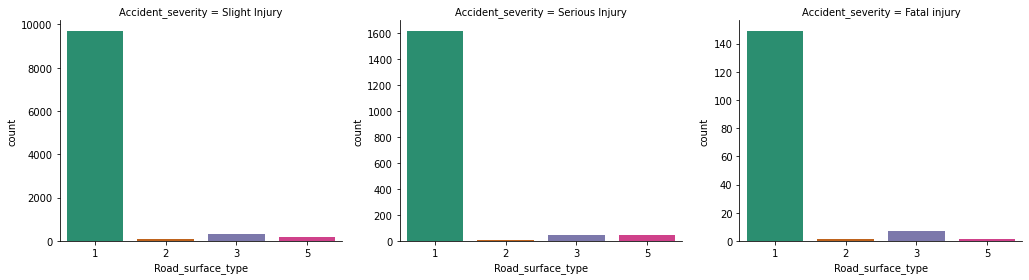

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


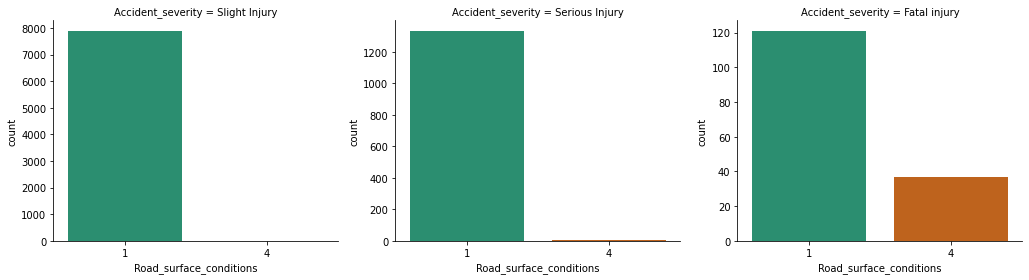

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


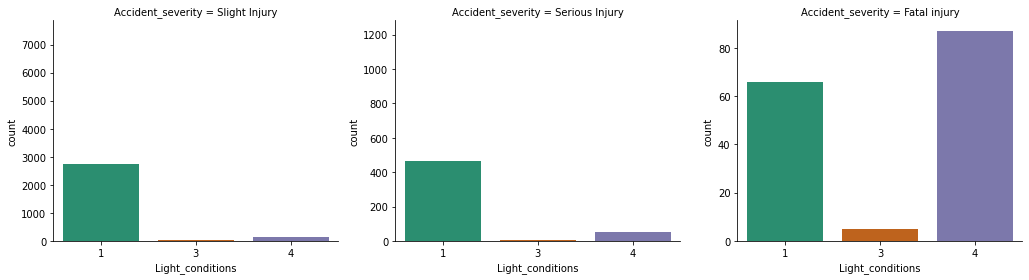

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


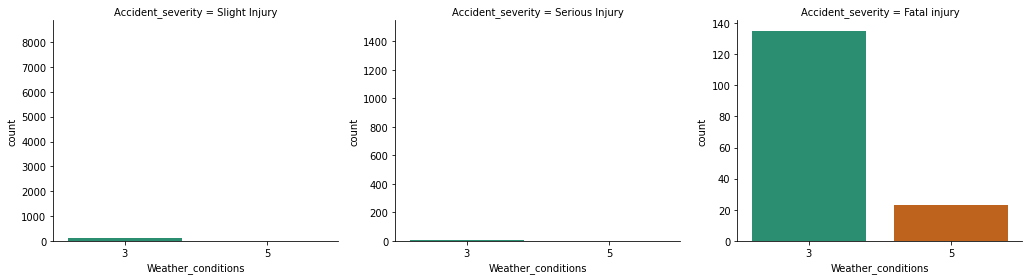

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


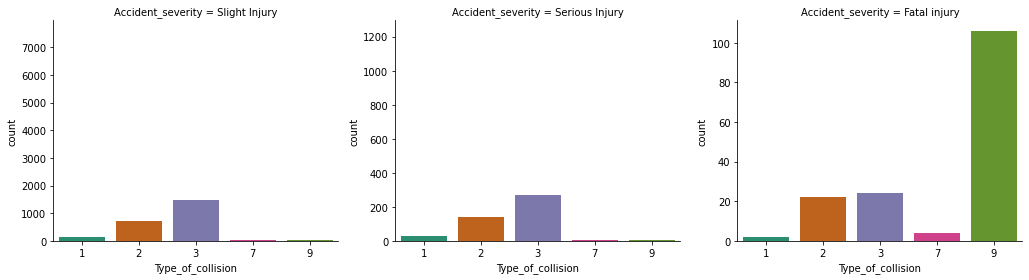

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


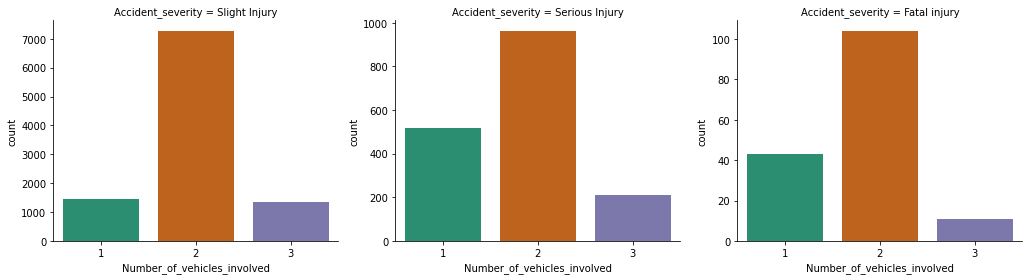

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


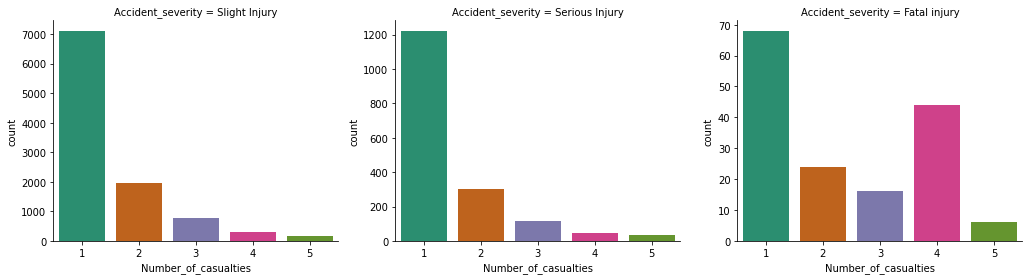

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


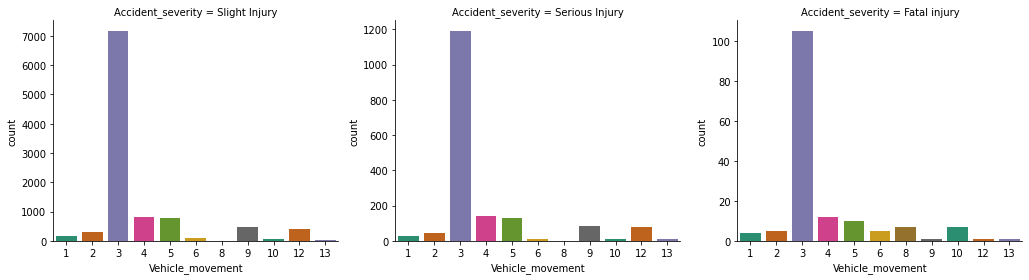

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


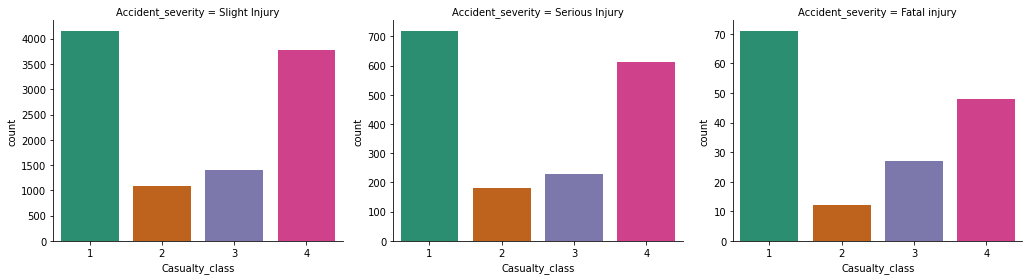

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


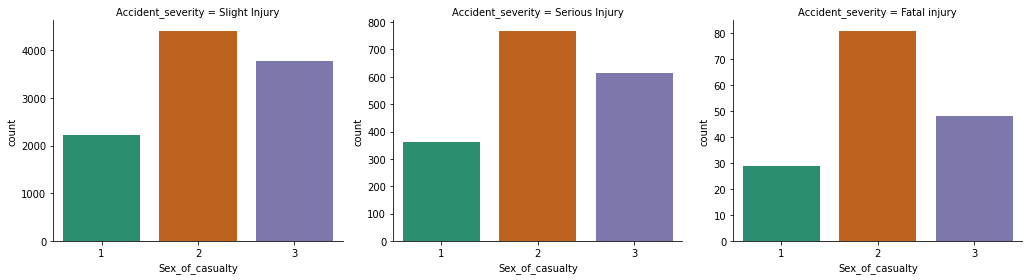

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


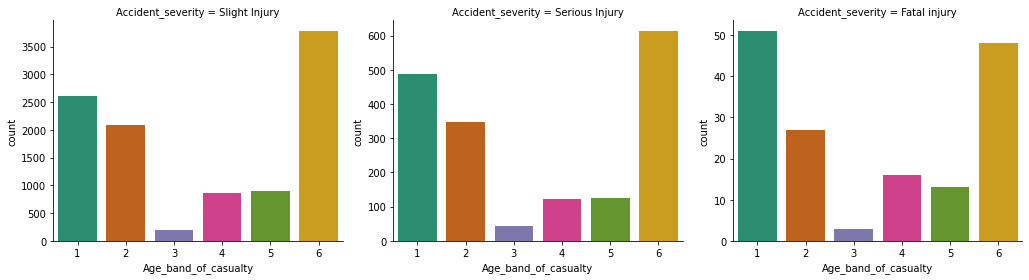

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


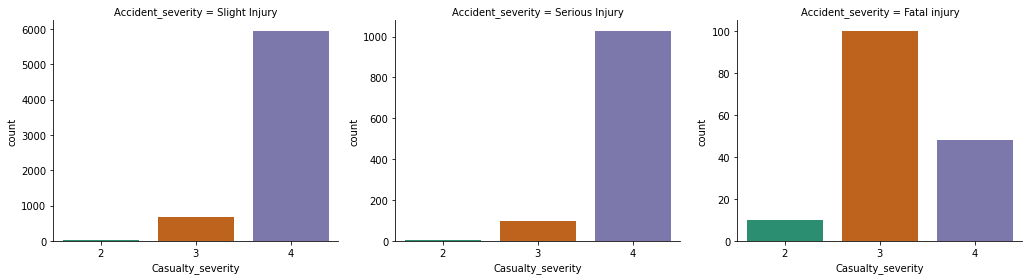

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


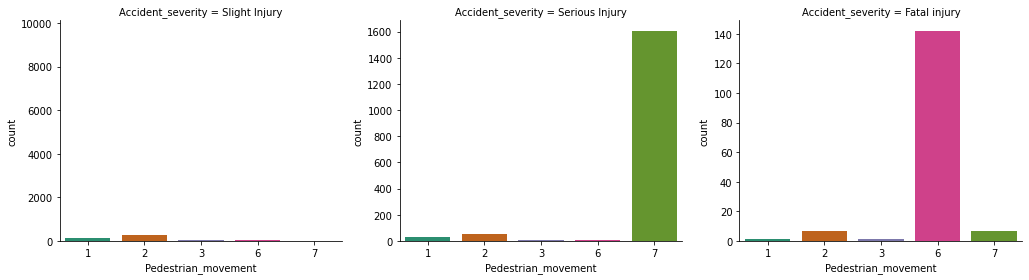

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


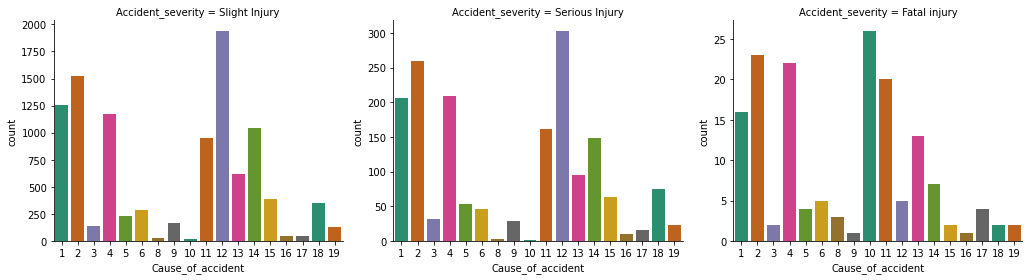

In [ ]:
for col in RTA_Data.drop('Accident_severity', axis=1):
    g = sns.FacetGrid(RTA_Data, col='Accident_severity', height=4, aspect=1.2, sharey=False)
    g.map(sns.countplot, col, palette = 'Dark2')
    plt.show()

In [ ]:
RTA_Data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,1,2,1,2,1,1,1,1,4,10,3,6,2,1,1,4,3,4,2,2,3,4,3,6,4,6,10,Slight Injury
1,1,2,2,2,5,1,4,12,4,7,5,6,2,1,1,4,3,9,2,2,3,4,3,6,4,6,17,Slight Injury
2,1,2,1,2,5,1,1,6,4,2,7,6,2,1,1,4,3,3,2,2,3,1,2,2,3,6,1,Serious Injury
3,2,4,1,2,5,1,3,12,1,7,7,7,8,3,1,1,3,9,2,2,3,3,1,1,3,6,2,Slight Injury
4,2,4,1,2,5,1,2,1,4,5,7,6,8,1,1,1,3,9,2,2,3,4,3,6,4,6,17,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,7,2,2,5,1,2,5,4,6,5,6,2,1,1,4,3,9,2,1,3,4,3,6,4,6,11,Slight Injury
12312,2,4,5,2,2,1,3,1,4,6,3,1,2,1,1,4,3,9,2,1,5,4,3,6,4,6,11,Slight Injury
12313,1,4,3,2,5,1,3,2,4,6,3,8,2,1,1,4,3,9,1,1,5,1,2,2,3,6,2,Serious Injury
12314,1,4,1,1,5,1,4,6,4,7,5,8,2,1,1,1,3,9,2,1,5,4,3,6,4,6,6,Slight Injury


In [ ]:
RTA_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,12316.0,1.321127,0.466928,1.0,1.0,1.0,2.0,2.0
Day_of_week,12316.0,3.980513,2.059712,1.0,2.0,4.0,6.0,7.0
Age_band_of_driver,12316.0,2.292952,1.337520,1.0,1.0,2.0,3.0,5.0
Sex_of_driver,12316.0,1.957535,0.263767,1.0,2.0,2.0,2.0,3.0
Educational_level,12316.0,4.208347,1.361538,1.0,3.0,5.0,5.0,7.0
Vehicle_driver_relation,12316.0,1.333793,0.741375,1.0,1.0,1.0,1.0,4.0
Driving_experience,12316.0,2.943732,1.236146,1.0,2.0,3.0,4.0,7.0
Type_of_vehicle,12316.0,6.100357,4.548810,1.0,1.0,6.0,9.0,17.0
Owner_of_vehicle,12316.0,3.693975,0.877637,1.0,4.0,4.0,4.0,4.0
Area_accident_occured,12316.0,7.439591,2.349455,1.0,7.0,8.0,8.0,14.0


In [ ]:
RTA_Data.corr()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident
Time,1.000000,-0.047445,0.003039,-0.041570,-0.000640,0.010754,0.005141,-0.010396,-0.004096,0.003584,-0.013307,-0.004914,-0.058842,0.004847,0.023678,-0.551455,0.025197,-0.004362,-0.018533,0.080820,-0.015331,0.001774,0.006459,0.011644,0.000154,0.005713,-0.008214
Day_of_week,-0.047445,1.000000,0.019993,0.009986,-0.004517,0.003303,-0.010062,-0.002417,0.001417,0.003281,-0.009320,-0.008505,-0.026669,0.009832,-0.008294,0.036280,-0.003248,0.003026,-0.005621,-0.050042,-0.027643,0.006661,0.001461,-0.003642,0.001512,0.000250,0.010516
Age_band_of_driver,0.003039,0.019993,1.000000,-0.351878,0.013613,-0.005841,-0.013407,0.004830,0.005405,0.011472,0.008176,0.000486,-0.028025,0.001058,-0.032533,-0.007766,0.025482,0.000496,0.001690,-0.054474,-0.006562,0.005386,0.011358,0.000043,0.003565,0.000372,-0.000703
Sex_of_driver,-0.041570,0.009986,-0.351878,1.000000,0.004967,0.011035,0.009855,-0.003757,-0.009489,-0.000274,-0.012529,-0.002238,0.004920,0.003112,0.031601,0.037390,-0.006179,-0.011513,-0.038643,0.048503,0.007058,0.003335,-0.006046,0.014191,0.002474,0.006981,-0.000598
Educational_level,-0.000640,-0.004517,0.013613,0.004967,1.000000,-0.076866,0.057625,0.005447,-0.012486,-0.006854,-0.002756,-0.010213,0.014798,0.014345,0.008614,-0.000290,-0.000242,-0.009477,0.012401,0.003698,0.004248,0.005382,0.007483,0.008226,0.004950,0.000177,-0.000451
Vehicle_driver_relation,0.010754,0.003303,-0.005841,0.011035,-0.076866,1.000000,0.016686,-0.003481,0.014860,0.021997,0.004656,-0.013660,-0.011548,-0.001312,0.004257,0.001351,-0.015357,-0.005568,0.008223,0.018222,0.005631,-0.002817,-0.000664,0.008115,-0.003230,0.015803,-0.010753
Driving_experience,0.005141,-0.010062,-0.013407,0.009855,0.057625,0.016686,1.000000,0.014333,0.000144,-0.000290,-0.010444,-0.015602,0.009245,0.020872,-0.003696,-0.015577,-0.000084,0.012574,-0.008222,-0.007118,0.004794,-0.002783,-0.000214,-0.010891,-0.004952,-0.018790,-0.007728
Type_of_vehicle,-0.010396,-0.002417,0.004830,-0.003757,0.005447,-0.003481,0.014333,1.000000,-0.012463,-0.007631,-0.020156,-0.020910,-0.005553,0.013972,0.019018,-0.003739,0.006903,0.025911,0.001140,0.003022,0.010841,-0.006116,-0.011247,-0.008934,-0.001679,0.010500,-0.004200
Owner_of_vehicle,-0.004096,0.001417,0.005405,-0.009489,-0.012486,0.014860,0.000144,-0.012463,1.000000,-0.021942,0.045938,0.011427,0.012105,-0.010030,-0.000976,0.013693,-0.009544,0.000271,0.008637,-0.004504,0.022287,0.003196,0.007335,0.011667,0.010517,0.023517,0.016550
Area_accident_occured,0.003584,0.003281,0.011472,-0.000274,-0.006854,0.021997,-0.000290,-0.007631,-0.021942,1.000000,0.022760,-0.025859,0.014580,-0.004275,-0.007290,-0.013597,0.003127,-0.003940,-0.016498,-0.004690,0.004691,0.011325,0.010546,0.008001,0.014565,0.000949,-0.009589


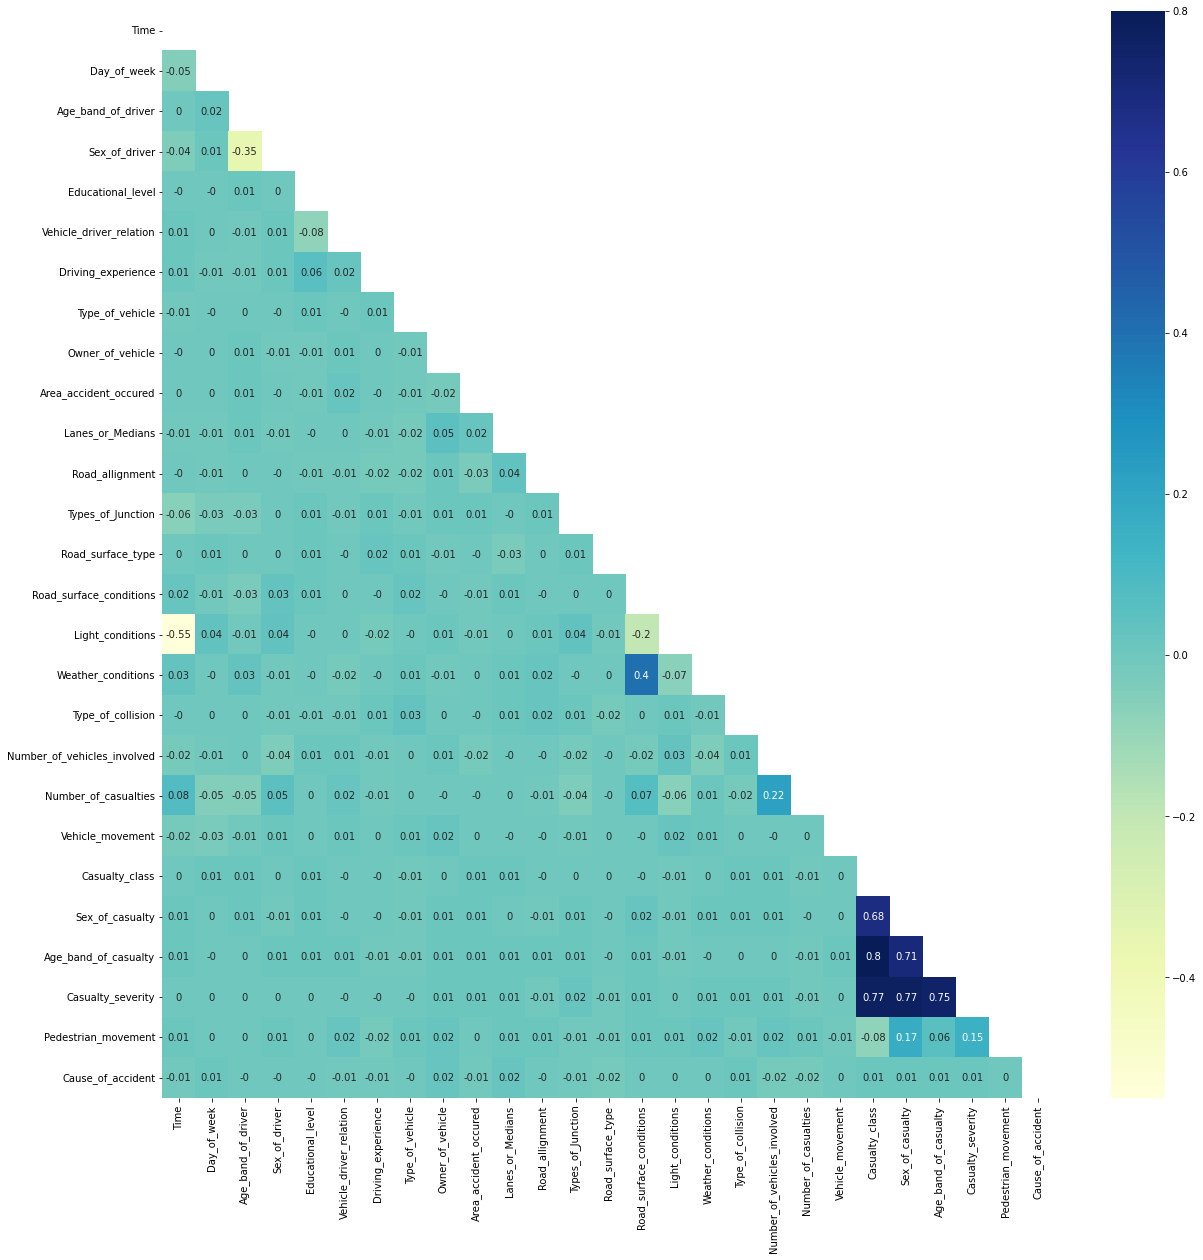

In [ ]:
plt.figure(figsize = (20, 20))
mask = np.triu(np.ones_like(RTA_Data.corr(), dtype=bool))
sns.heatmap(RTA_Data.corr().round(2),annot=True, cmap="YlGnBu",mask=mask)

In [ ]:
RTA_Data.to_csv("RTA_Cleaned_LableEnoded.csv",index=False)

## Oversampling the imbalance data using SMOTE (synthetic Minority oversampling technique)

### Seperate the independent and target features

In [ ]:
from sklearn.model_selection import train_test_split

X = RTA_Data.drop(['Accident_severity'],axis=1)
y = RTA_Data['Accident_severity']

In [ ]:
target_class = ['Fatal Injury','Serious Injury', 'Slight Injury']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,stratify=y,random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8621, 27) (3695, 27) (8621,) (3695,)


### Target distridution before upsampling

Class= Serious Injury, n=1220 (14.15%)
Class= Slight Injury, n=7290 (84.56%)
Class= Fatal injury, n=111 (1.29%)


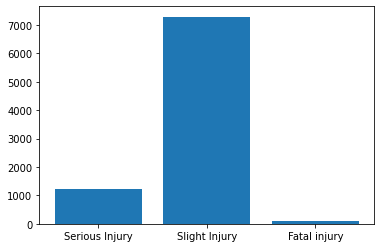

In [ ]:
from collections import Counter
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print(f"Class= {k}, n={v} ({per:.2f}%)")
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class= Serious Injury, n=7290 (33.33%)
Class= Slight Injury, n=7290 (33.33%)
Class= Fatal injury, n=7290 (33.33%)


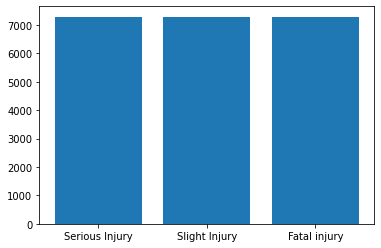

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)
counter = Counter(y_train)
for k,v in counter.items():
    per = v / len(y_train) * 100
    print(f"Class= {k}, n={v} ({per:.2f}%)")
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

## Baseline Model Fitting

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier


In [ ]:
import sklearn
sklearn.__version__


'1.0.2'

In [ ]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('Xtree', ExtraTreesClassifier()))
models.append(('ada', AdaBoostClassifier()))
models.append(('gradboost', GradientBoostingClassifier()))
models.append(('XGB', XGBClassifier()))


In [ ]:
num_folds = 5
seed = 7
scoring = 'accuracy'


In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LR: 0.596342 (0.001534)
KNN: 0.821811 (0.005243)
NB: 0.524417 (0.007623)
SVM: 0.800869 (0.007501)
DT: 0.840741 (0.005251)
RF: 0.927663 (0.004664)
Xtree: 0.938363 (0.002719)
ada: 0.681664 (0.006086)
gradboost: 0.788935 (0.003546)
XGB: 0.756653 (0.005435)


### Training with Xtree



In [ ]:
Rtree = RandomForestClassifier()
Rtree.fit(X_train, y_train)
y_pred = Rtree.predict(X_test)

In [ ]:
#Show metrics
def model_evaluation(model,y_test,y_hat):
  Accuracy  =  accuracy_score(y_test, y_hat)
  Precision =  precision_score(y_test, y_pred, average= 'weighted')
  Recall    =  recall_score(y_test, y_pred, average= 'weighted')
  F1_score  =  f1_score(y_test, y_pred, average= 'weighted')
  show_metrics = pd.DataFrame({'Metrics' : ['Accuracy','Precision','Recall','F1_score'], 
                               'Score': [Accuracy , Precision, Recall, F1_score]})
  show_metrics = show_metrics
  return show_metrics

In [ ]:
model_evaluation(Rtree,y_test,y_pred)

,Metrics,Score
0,Accuracy,0.799188
1,Precision,0.768466
2,Recall,0.799188
3,F1_score,0.781781


In [ ]:
model_evaluation(Rtree,y_test,y_pred)
Rtree.score(X_train, y_train)

1.0

In [ ]:
Rtree.score(X_test,y_test)

0.7991880920162382

## Hyperparameter Tuning

In [ ]:
Rtree.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [ ]:

kf = KFold(n_splits = 5,shuffle=True,random_state=25,).split(X=X_train,y=y_train)
# paramgrid
params = {
    'n_estimators' : range(100,500,100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3]
}

rt1 = RandomForestClassifier()

gs1 = GridSearchCV(
    estimator= rt1,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=kf,
    verbose=3,
)

rt_model_1 = gs1.fit(X=X_train, y=y_train)
(gs1.best_params_, gs1.best_score_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 400},
 0.834882601004151)

In [ ]:
y_pred = rt_model_1.predict(X_test)
model_evaluation(rt_model_1,y_test,y_pred)

,Metrics,Score
0,Accuracy,0.743708
1,Precision,0.768344
2,Recall,0.743708
3,F1_score,0.755373


In [ ]:
kf2 = KFold(n_splits = 5,shuffle=True,random_state=25,).split(X=X_train,y=y_train)
# paramgrid
params = {
    'n_estimators' : range(400,1000,100),
    'max_depth': [15,20],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None]
}

rt2  = RandomForestClassifier(ccp_alpha=0.0,
                                        criterion='gini',
                                        max_depth=15,
                                        min_samples_split=3,
                                        n_estimators=400)

gs2 = GridSearchCV(
    estimator= rt2,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=kf2,
    verbose=3,
)

rt_model_2 = gs2.fit(X=X_train, y=y_train)
(gs2.best_params_, gs2.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


({'class_weight': 'balanced',
  'max_depth': 20,
  'min_samples_split': 2,
  'n_estimators': 700},
 0.9261034436317035)

In [ ]:
rt_model_2.score(X_train, y_train)

0.9971187821677958

In [ ]:
rt_model_2.score(X_test, y_test)

0.7807201816352467

In [ ]:
y_pred = rt_model_2.predict(X_test)

In [ ]:
model_evaluation(rt_model_2,y_test,y_pred)

,Metrics,Score
0,Accuracy,0.793234
1,Precision,0.770321
2,Recall,0.793234
3,F1_score,0.780720


In [ ]:
rt3 = RandomForestClassifier(ccp_alpha=0.0,
                                        criterion='gini',
                                        max_depth=35,
                                        min_samples_split=2,
                                        n_estimators=900,
                                       class_weight ='balanced')

rt_model_3 = rt3.fit(X=X_train, y=y_train)


In [ ]:
rt_model_3

RandomForestClassifier(class_weight='balanced', max_depth=35, n_estimators=900)

In [ ]:
y_pred = rt_model_3.predict(X_train)
model_evaluation(rt_model_3,y_train,y_pred)

,Metrics,Score
0,Accuracy,1.0
1,Precision,1.0
2,Recall,1.0
3,F1_score,1.0


In [ ]:
y_pred = rt_model_3.predict(X_test)
model_evaluation(rt_model_3,y_test,y_pred)

,Metrics,Score
0,Accuracy,0.805683
1,Precision,0.770382
2,Recall,0.805683
3,F1_score,0.785344


In [ ]:
import joblib
import pickle

In [ ]:
filename = 'RT_model.pkl'
joblib.dump(rt_model_3, open(filename, 'wb'),compress=3)

In [ ]:
rt_model_3.feature_importances_

array([0.01991129, 0.06365753, 0.0537153 , 0.01031958, 0.03562395,
       0.0242658 , 0.05204969, 0.06120354, 0.01785252, 0.05390848,
       0.05068329, 0.01801797, 0.04444915, 0.00863469, 0.03516967,
       0.06756222, 0.0198048 , 0.03592216, 0.05936892, 0.0624743 ,
       0.03737868, 0.02424845, 0.01938203, 0.03056671, 0.01476249,
       0.00938755, 0.06967926])

In [ ]:
X_train.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

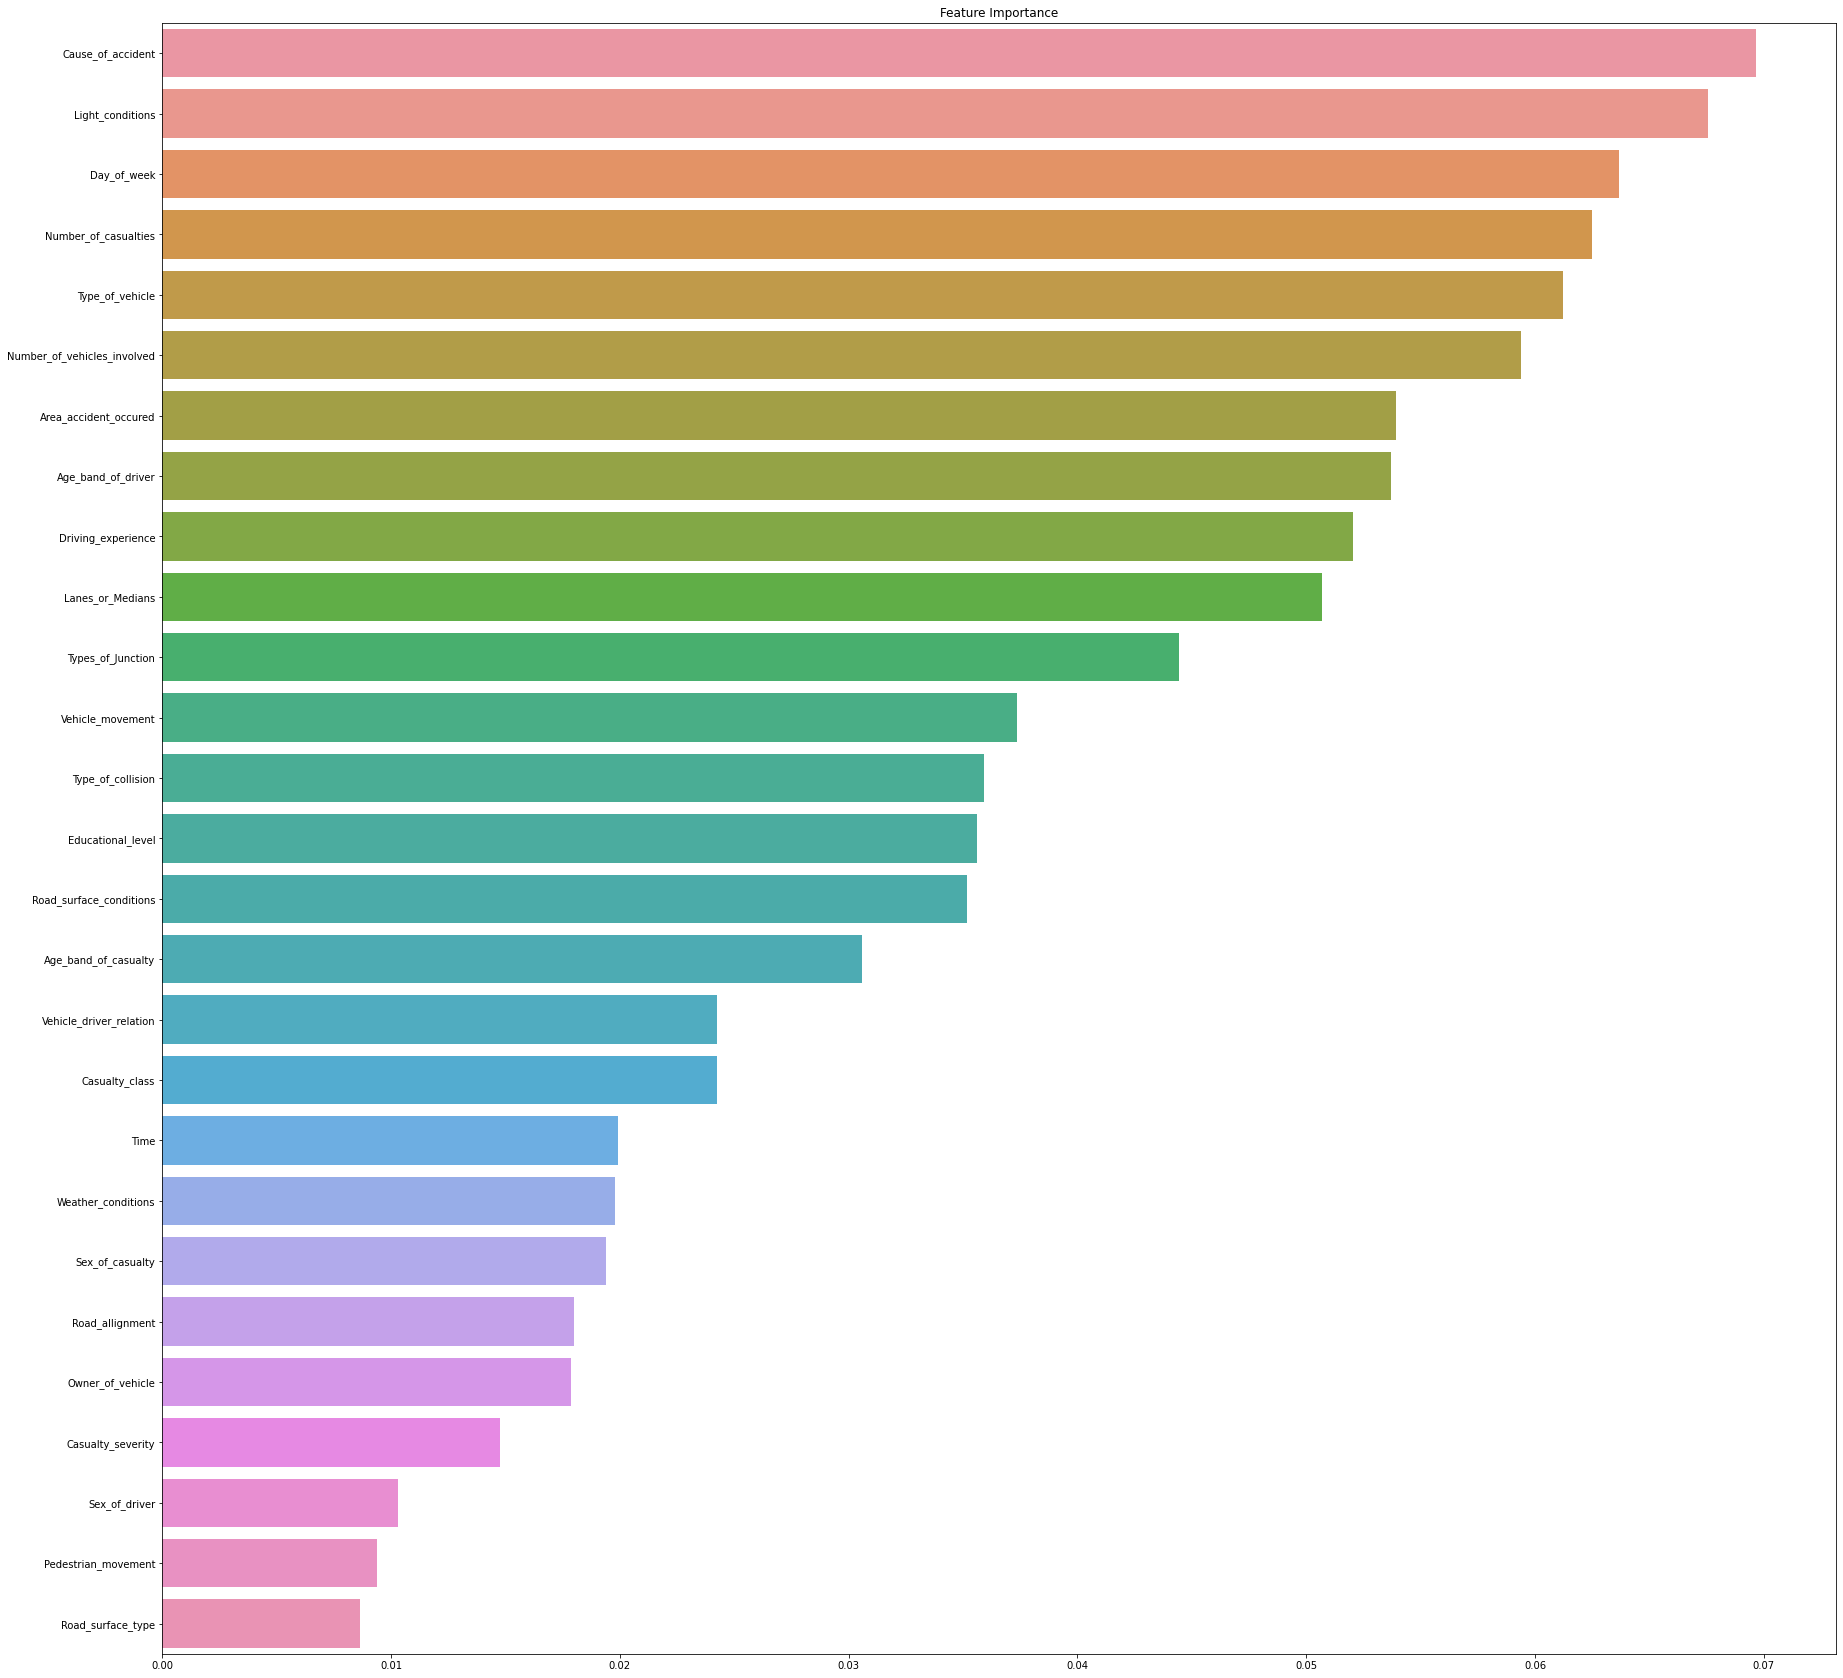

In [ ]:
plt.figure(figsize=(30,30))
Feature_importance_rt = pd.Series(data = rt_model_3.feature_importances_, 
                               index=X_train.columns).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance_rt.index,x=Feature_importance_rt.values,orient ='h')

In [ ]:
new_X_train = ['Day_of_week','Time','Number_of_casualties', 'Light_conditions',  'Age_band_of_driver',
       'Educational_level',  'Driving_experience', 'Number_of_vehicles_involved', 
       'Type_of_vehicle', 
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_conditions', 
       'Type_of_collision',
      
       'Vehicle_movement', 
      
       'Cause_of_accident']

In [ ]:
new_X_train = X_train[['Day_of_week', 'Cause_of_accident','Number_of_casualties', 'Number_of_vehicles_involved', 'Light_conditions',  'Age_band_of_driver','Educational_level', 'Driving_experience', 
       'Type_of_vehicle', 'Lanes_or_Medians',  'Types_of_Junction','Road_surface_conditions', "Area_accident_occured",'Type_of_collision']]  
new_X_test = X_test[['Day_of_week',  'Cause_of_accident','Number_of_casualties', 'Number_of_vehicles_involved', 'Light_conditions',  'Age_band_of_driver','Educational_level', 'Driving_experience', 
       'Type_of_vehicle', 'Lanes_or_Medians', 'Types_of_Junction','Road_surface_conditions', "Area_accident_occured",'Type_of_collision']]   
new_X_train     
     

,Day_of_week,Cause_of_accident,Number_of_casualties,Number_of_vehicles_involved,Light_conditions,Age_band_of_driver,Educational_level,Driving_experience,Type_of_vehicle,Lanes_or_Medians,Types_of_Junction,Road_surface_conditions,Area_accident_occured,Type_of_collision
0,6,2,1,2,4,5,5,3,15,5,8,1,8,3
1,1,8,1,2,4,1,5,3,13,5,2,1,10,9
2,2,11,1,4,4,2,2,5,15,3,8,1,7,9
3,3,6,1,3,4,1,5,3,8,7,1,1,3,2
4,6,11,1,2,4,4,2,2,9,3,1,1,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21865,5,1,2,2,4,1,2,3,7,3,8,1,4,3
21866,6,11,1,1,1,2,5,3,7,7,8,3,6,9
21867,5,2,1,2,4,1,5,4,9,3,8,1,7,9
21868,1,11,1,2,2,1,5,2,10,3,8,1,10,9


In [ ]:
rt_reduced = RandomForestClassifier(ccp_alpha=0.0,
                                        criterion='gini',
                                        max_depth=35,
                                        min_samples_split=2,
                                        n_estimators=900,
                                        class_weight ='balanced')
rt_reduced.fit(new_X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=35, n_estimators=900)

In [ ]:
y_pred = rt_reduced.predict(new_X_test)
model_evaluation(rt_reduced,y_test,y_pred)

,Metrics,Score
0,Accuracy,0.791069
1,Precision,0.772142
2,Recall,0.791069
3,F1_score,0.780922


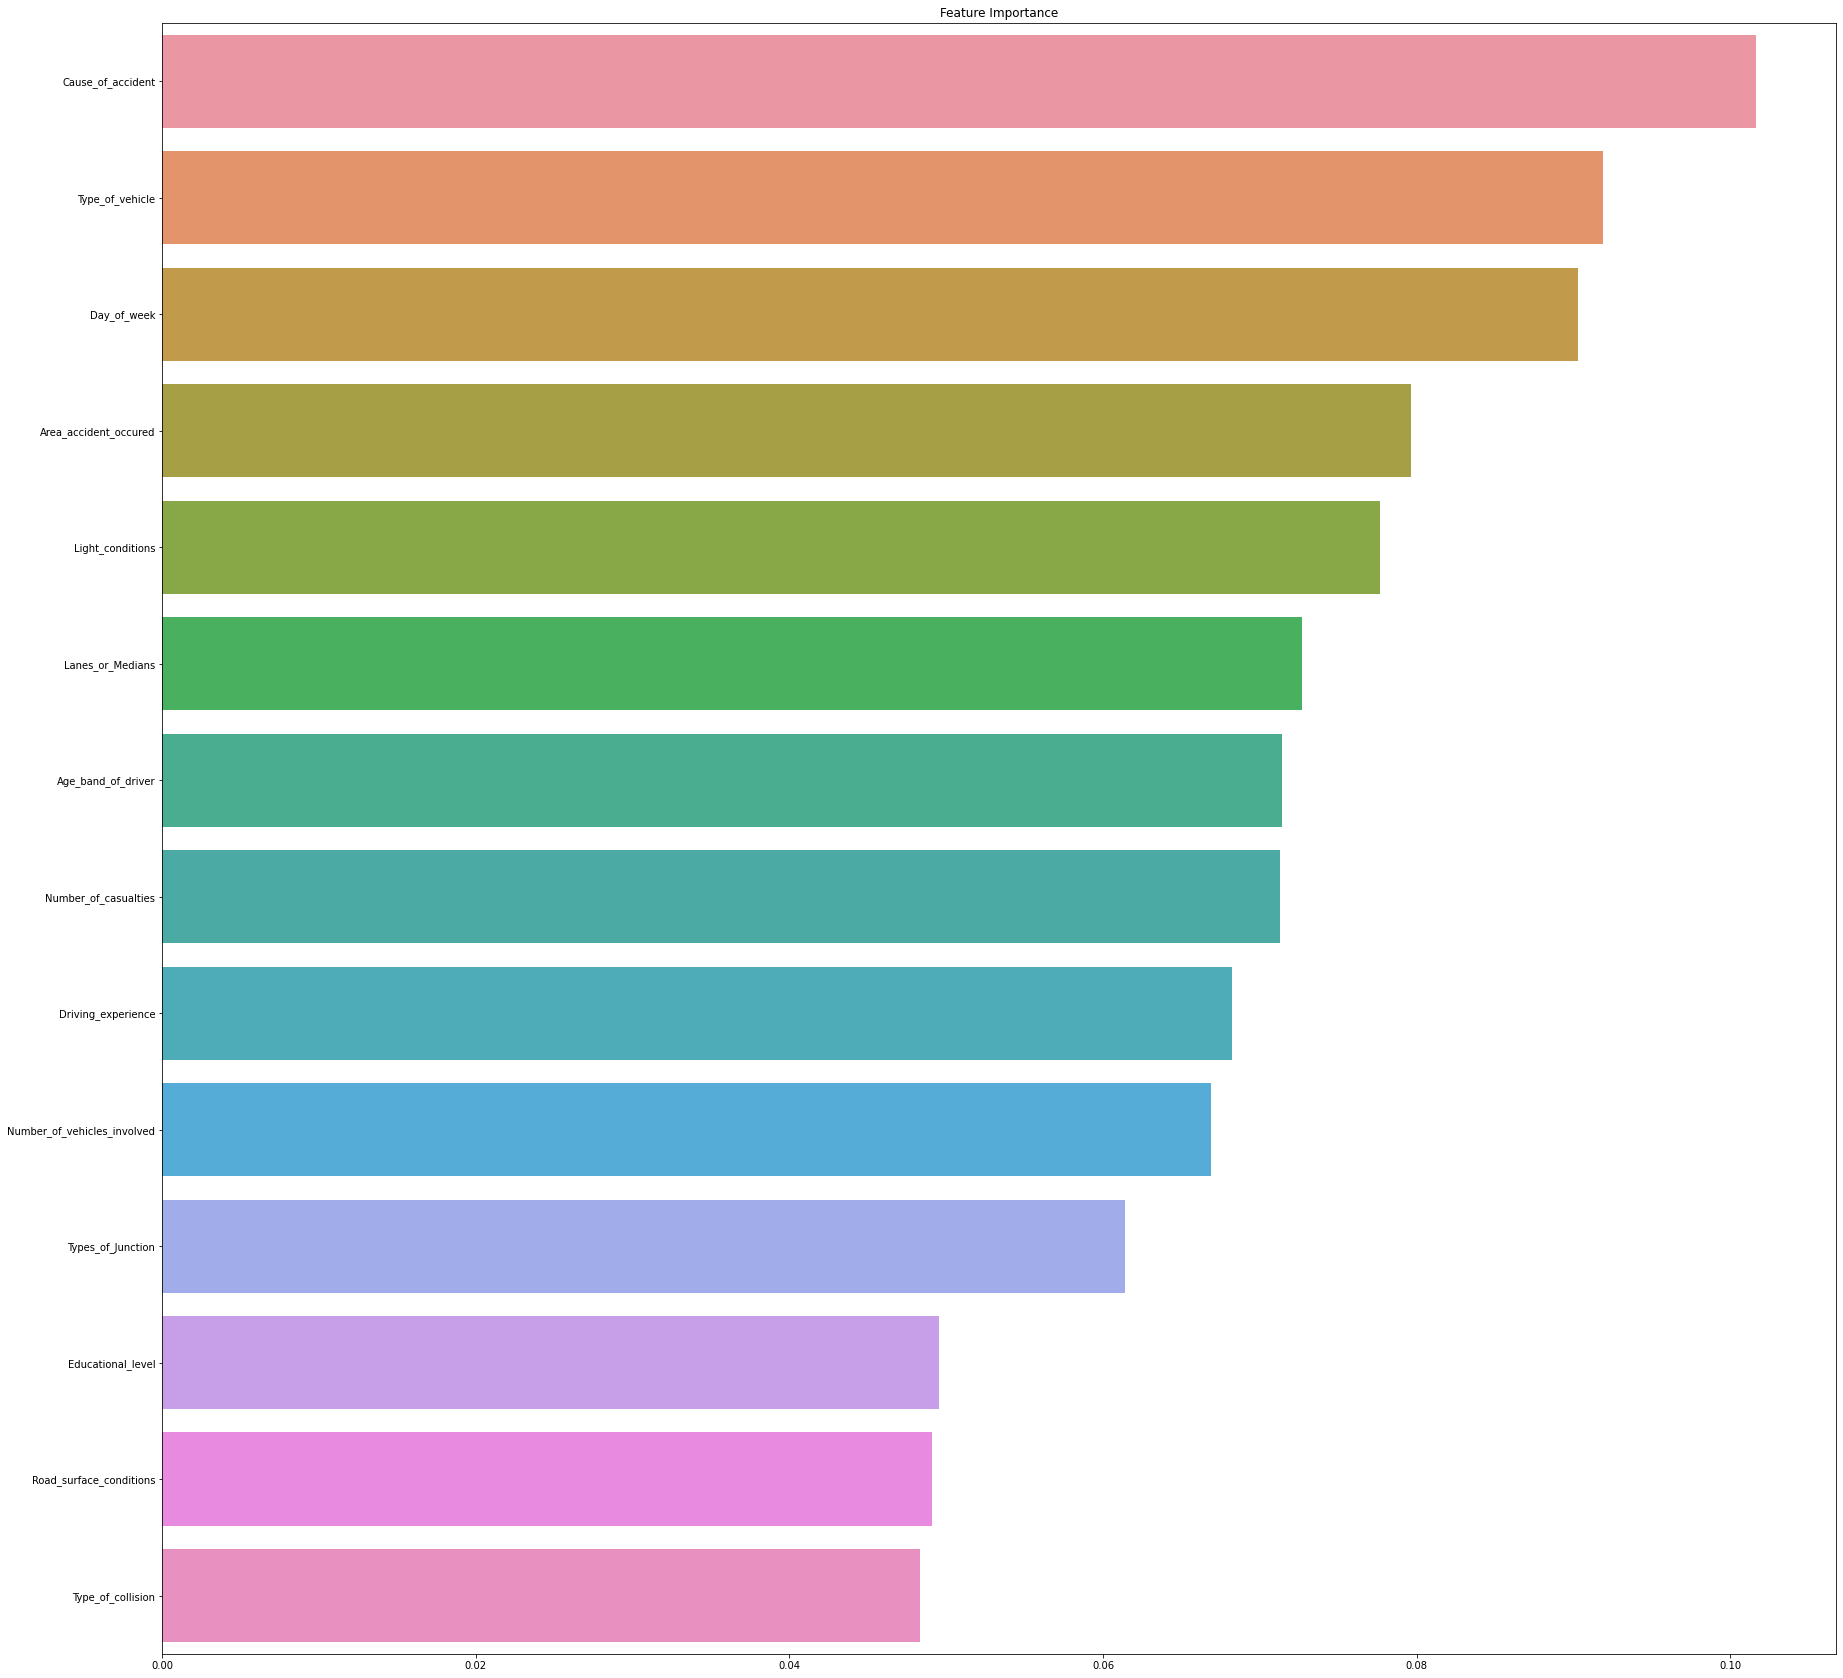

In [ ]:
plt.figure(figsize=(30,30))
Feature_importance_rt = pd.Series(data = rt_reduced.feature_importances_, 
                               index=new_X_train.columns).sort_values(ascending=False)
plt.title("Feature Importance")
sns.barplot(y=Feature_importance_rt.index,x=Feature_importance_rt.values,orient ='h')

In [ ]:
filename = 'rt_reduced.joblib'
joblib.dump(rt_reduced, open(filename, 'wb'),compress=3)

In [ ]:

import sys
sys.getsizeof(rt_reduced)

64

In [ ]:
import sklearn
import numpy
import pandas
import pillow
import scipy
import joblib


In [ ]:
sklearn.__version__


'1.0.2'